## **Bài 1**


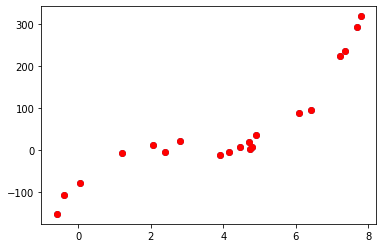

w = [  3.2448925  -30.20029032  89.30840541 -78.75403971]


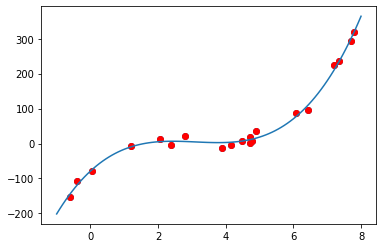

In [ ]:
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib.pyplot as plt

#x = np.array([[7.79667589, 2.79825217, 2.06174503, 4.4713877 , 7.20443649, 7.36014312, 4.70688117,-0.40338389, 4.72266607, 1.20453709, 6.07593449, 7.69651292, 3.89733971, 4.7856351,-0.59932188, 4.1507473, 0.04186784, 4.89562846, 2.38650347, 6.42758034]]).T
#y = np.array([[318.28185696,  20.48143891,  11.97873995,   7.56902114, 224.15497306, 235.04403786,  17.75040067,-107.86335911, 1.1140603, -7.67492972, 87.4263873, 293.22569099, -11.49557421,  6.4415876,-152.88870565, -4.95755333,-79.53431819, 34.97246059, -4.50098315, 95.09276699]]).T

x = [7.79667589, 2.79825217, 2.06174503, 4.4713877 , 7.20443649, 7.36014312, 4.70688117,-0.40338389, 4.72266607, 1.20453709, 6.07593449, 7.69651292, 3.89733971, 4.7856351,-0.59932188, 4.1507473, 0.04186784, 4.89562846, 2.38650347, 6.42758034]
y = [318.28185696,  20.48143891,  11.97873995,   7.56902114, 224.15497306, 235.04403786,  17.75040067,-107.86335911, 1.1140603, -7.67492972, 87.4263873, 293.22569099, -11.49557421,  6.4415876,-152.88870565, -4.95755333,-79.53431819, 34.97246059, -4.50098315, 95.09276699]

# Visualize data 
plt.plot(X, y, 'ro')
plt.scatter(x, y)
plt.show()

mymodel = np.poly1d(np.polyfit(x, y, 3))
print('w =',np.polyfit(x, y, 3))
myline = np.linspace(-1, 8, 100)
plt.plot(X, y, 'ro')
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

# **Bài 2**

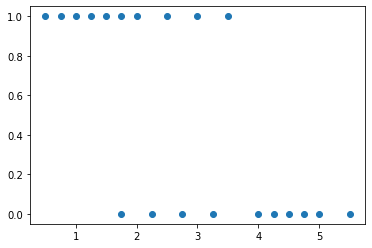

In [ ]:
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(2)

X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])
plt.scatter(X, y)
# extended data 
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

In [ ]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]    
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:                
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w
eta = .05 
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])

[[ 4.08160737]
 [-1.59762962]]


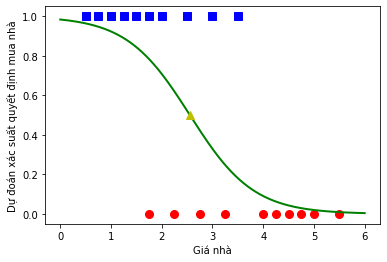

In [ ]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
#plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('Giá nhà')
plt.ylabel('Dự đoán xác suất quyết định mua nhà')
plt.show()

# **Bài 3**

In [ ]:
import numpy as np
from sklearn.svm import SVC

X1 = [[ 1.92306918, 0.775673 ],
[ 2.90509186, 1.7997662 ],
[ 1.58909188, 1.16143907],
[ 2.76874122, 1.07663514],
[ 2.52416203, 1.53020387],
[ 2.02414192, 1.80692632],
[ 2.49174878, 2.62943405],
[ 1.11439322, 2.88348991],
[ 2.62561276, 2.89077234],
[ 3.27183166, 0.75454543],
[ 3.55617919, 0.66250438],
[ 1.45945603, 2.28222634],
[ 2.87575608, 2.52637908],
[ 2.30375703, 2.46497356],
[ 1.08925412, 2.01982447],
[ 4.09096119, -0.08330889],
[ 1.80350003, 1.91837255],
[ 1.25827634, 1.8856175 ],
[ 2.08532169, 1.79005729],
[ 1.9340609 , 1.09208652]]
y1 = [1, 1, 1, 1, 1,1, 1, 1, 1, 1,1, 1, 1, 1, 1,1, 1, 1, 1, 1]
X2 = [[4.49775285, 1.46545116],
[3.07311718, 3.76212796],
[3.52528933, 1.59844519],
[2.39091046, 2.33431976],
[3.12302646, 1.41945943],
[4.62359547, 2.44921113],
[3.38696098, 2.46494505],
[4.36167918, 1.88637824],
[3.21261415, 2.40558547],
[2.71754956, 2.33882965],
[4.01073111, 0.96947283],
[3.11892586, 4.10522222],
[2.29402636, 2.07905375],
[3.7365999 , 2.41022672],
[4.29699439, 2.79542218],
[4.63617269, 2.00962462],
[2.84870815, 1.77280105],
[4.45368062, 2.44805003],
[4.97052399, 1.86194687],
[3.01324102, 1.54377016]]
y2 = [-1, -1, -1, -1,-1, -1, -1, -1,-1, -1, -1, -1,-1, -1, -1, -1,-1, -1, -1, -1]
X = np.array(X1 + X2)
y = y1 + y2

clf = SVC(kernel='linear', C=5)  #1E10
clf.fit(X, y)

w_sklearn = clf.coef_.reshape(-1, 1)
b_sklearn = clf.intercept_[0]
print(w_sklearn.T, b_sklearn)

[[-1.30588089 -1.2587534 ]] 6.22271489929831


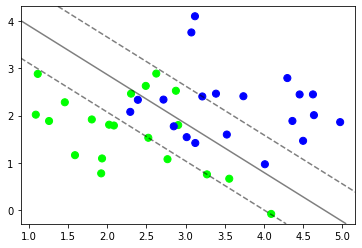

In [ ]:
import matplotlib.pyplot as plt

def plot_svc_decision_function(clf, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = clf.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(clf.support_vectors_[:, 0],
                   clf.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='brg');
plot_svc_decision_function(clf)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

parameter_candidates = [
  {'C': [0.001, 0.01, 0.1, 1, 5, 100, 1000], 'kernel': ['linear']},
]

clf = GridSearchCV(estimator=SVC(), param_grid=parameter_candidates, n_jobs=-1)
clf.fit(X, y)
print('Best score:', clf.best_score_)
print('Best C:',clf.best_estimator_.C)

Best score: 0.825
Best C: 5


# **Bài 4**

In [ ]:
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model

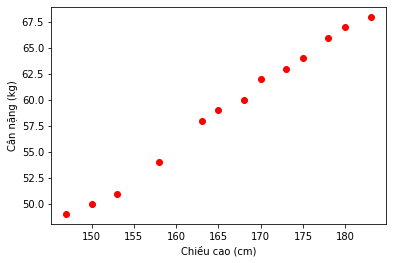

In [ ]:
#X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183, 184, 150]]).T
#y = np.array([[49, 50, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68, 42, 90]]).T

X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
y = np.array([[49, 50, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
# Visualize data 
plt.plot(X, y, 'ro')
#plt.axis([140, 190, 45, 75])
plt.xlabel('Chiều cao (cm)')
plt.ylabel('Cân nặng (kg)')
plt.show()

In [ ]:
# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)
b = np.dot(Xbar.T, y)

#Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

#Results
w = regr.coef_
print( 'Solution found by scikit-learn  : ', w )

Solution found by scikit-learn  :  [[-33.73541021   0.55920496]]


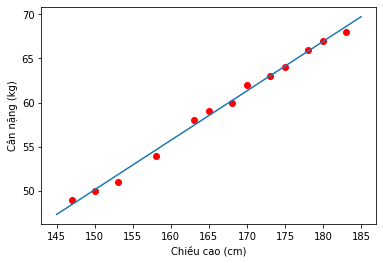

In [ ]:
# Preparing the fitting line 
w_0 = w[0][0]
w_1 = w[0][1]
x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1*x0

# Drawing the fitting line 
plt.plot(X.T, y.T, 'ro')     # data 
plt.plot(x0, y0)               # the fitting line
#plt.axis([140, 190, 45, 75])
plt.xlabel('Chiều cao (cm)')
plt.ylabel('Cân nặng (kg)')
plt.show()

# **Bài 5**

In [ ]:
import numpy as np
from sklearn.svm import SVC
from math import *

X1 = [[2.37319011, 1.71875981],
[1.51261889, 1.40558943],
[2.4696794 , 2.02144973],
[1.78736889, 1.29380961],
[1.81231157, 1.56119497],
[2.03717355, 1.93397133],
[1.53790057, 1.87434722],
[2.29312867, 2.76537389],
[1.38805594, 1.86419379],
[1.57279694, 0.90707347]]
y1 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
X2 = [[3.42746579, 0.71254431],
[4.24760864, 2.39846497],
[3.33595491, 1.61731637],
[3.69420104, 1.94273986],
[4.53897645, 2.54957308],
[3.3071994 , 0.19362396],
[4.13924705, 2.09561534],
[4.47383468, 2.41269466],
[4.00512009, 1.89290099],
[4.28205624, 1.79675607]]
y2 = [-1, -1, -1, -1,-1, -1, -1, -1,-1, -1]
X = np.array(X1 + X2)
y = y1 + y2

clf1 = SVC(kernel='linear', C=1E10)
clf1.fit(X, y)

clf2 = SVC(kernel='linear', C=0.001)
clf2.fit(X, y)

clf3 = SVC(kernel='linear', C=1)
clf3.fit(X, y)

w_sklearn = clf3.coef_.reshape(-1, 1)
b_sklearn = clf3.intercept_[0]
print(w_sklearn.T, b_sklearn)

def margin(w):
  margin = 2/sqrt(w[0]**2+ w[1]**2)
  return margin
margin1 = margin(clf1.coef_.reshape(-1, 1))
print(margin1)
margin2 = margin(clf2.coef_.reshape(-1, 1))
print(margin2)
margin3 = margin(clf3.coef_.reshape(-1, 1))
print(margin3)


[[-1.5733851   0.34780067]] 4.136342536959894
0.9479816049841574
96.76253145886203
1.2411816110960245


In [ ]:
from sklearn.model_selection import GridSearchCV

parameter_candidates = [
  {'C': [0.001, 0.01, 0.1, 1, 5, 10, 100, 1000], 'kernel': ['linear']},
]

clf = GridSearchCV(estimator=SVC(), param_grid=parameter_candidates, n_jobs=-1)
clf.fit(X, y)
print('Best score:', clf.best_score_)
print('Best C:',clf.best_estimator_.C)

Best score: 1.0
Best C: 0.001


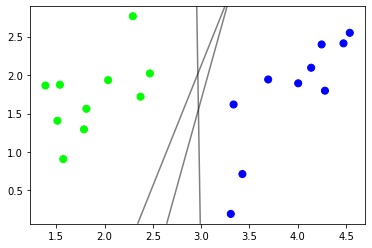

In [ ]:
import matplotlib.pyplot as plt

def plot_svc_decision_function(clf, ax=None, plot_support=True, label = [] ):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = clf.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',levels=[0], alpha=0.5)
    
    # plot support vectors
    if plot_support:
        ax.scatter(clf.support_vectors_[:, 0],
                   clf.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='brg')
plot_svc_decision_function(clf1)
plot_svc_decision_function(clf2)
plot_svc_decision_function(clf3)
plt.show()